# TP 2 : Deux modèles d'EDO pour l'interaction proie-prédateur


## Modèle de Lotka-Volterra

Après la première guerre mondiale, le zoologiste Umberto d'Anconna étudia les effets de la guerre sur la pêche de la sardine dans les ports de la mer Adriatique. Le résultat de cette étude surprenait : alors que pendant la guerre la pêche à la sardine avait diminué, la part de celles-ci dans les captures, qui aurait dû augmenter, avait pourtant baissé au profit de leurs prédateurs dont les requins, ce qui est paradoxal. Ce comportement fut observé simultanément dans les ports de Trieste et de Fiume.

D'Anconna demanda alors à Vito Volterra, qui était un des grands mathématiciens de l'époque, s'il pouvait trouver une explication mathématique à ce phénomène. Il écrivit un modèle mathématique basé sur un système d'équations différentielles régissant la dynamique des espèces considérées.\\

L'objectif de ce TP est d'étudier ce modèle ainsi que de justifier le paradoxe observé par d'Anconna.

On se donne donc deux populations $H(t)$ de sardines (les proies) et $P(t)$ de requins (les prédateurs) au temps $t,$ dont l'évolution au cours du temps suit la loi :

\begin{equation}
\label{LV}
  \begin{cases}
    H'(t) = H(t)(a - b P(t)) \\
    P'(t) = P(t)(-c  + d H(t)),
  \end{cases}
\tag{LV}
\end{equation}

où $a,b,c,d >0$.
On suppose connues les populations de sardines et de requins à l'instant initial $t_0=0$ :
\begin{equation}
\label{lvdi}
\tag{CI}
  \begin{cases}
    H(0) = H_0, \\
    P(0) = P_0,
  \end{cases}
\end{equation}
où $H_0\ge 0$ et $P_0\ge 0$ sont donnés.

## 1. Analyse du modèle

**Q1)** En posant $Y = (H,P)$, réécrire le système \eqref{LV} sous la forme $Y' = F(Y)$ où $F=(F_1,F_2)$ avec $F_1,F_2$ deux fonctions définies sur $\mathbb{R}^2$ à valeurs dans $\mathbb{R}$.

> **Réponse:** 

$F_1(Y)=H(a-bP)$ et $F_2(Y)=P(-c+dH)$

On suppose ici que le problème de Cauchy \eqref{eq:lv}-\eqref{lvdi} admet une unique solution maximale définie sur un intervalle $J$ contenant $[0,+\infty).$ On montrera dans le prochain TD que c'est bien le cas.

**Q2)** Déterminer les points d'équilibre de l'équation différentielle c'est-à-dire les points $(H_{eq},P_{eq})$ vérifiant $F_1(H_{eq},P_{eq})=F_2(H_{eq},P_{eq})=0$ (ce sont les solutions stationnaires du système différentiel). Que se passe-t-il si on choisit $(H_{eq},P_{eq})$ comme condition initiale?

> **Réponse:** 
$(H_{eq},P_{eq})=(0,0)$ et $(H_{eq},P_{eq})=(c/d,a/b)$.


**Q3)** Dans le plan $(H,P)$, représentez  les points d'équilibre du système. Etudier le signe des dérivées $H'$ et $P'$ et représenter le sens et la direction des champ de vecteurs dans le plan $(H,P),$ suivant la position de $H$ et $P$ par rapport aux points stationnaires. Quel sera le comportement des solutions $(H,P)$ suivant la condition initiale?

## 2. Approximation numérique

On s'intéresse dans cette partie à l'approximation numérique de la solution de \eqref{eq:lv}-\eqref{lvdi}, dans un intervalle de temps de la forme $[0,T].$ 

Pour toutes les applications numériques, on choisit dans la suite
$a=0,1$, $b=d=5\cdot 10^{-5},$ $c=0,04$ et $T=200$ ans. On choisit une population initiale de $H_0=2000$ sardines et $P_0=1000$ requins.

**Q1)** Dans une première figure, représentez dans l'espace des phases $(H,P)$ le champ de vecteur associé
à ce système d'équations via

`x, y = np.meshgrid(np.linspace(0 , 3000, 20) , np.linspace (0 , 4500, 30))
n=np.sqrt(F1(x,y)**2+F2(x,y)**2)  
plt.quiver (x , y, F1(x , y)/n, F2 (x , y)/n,angles='xy',scale=20,color='blue')`

Confrontez le résultat à la question **Q1.3**.


/Users/nenna/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


Text(0,0.5,'P')

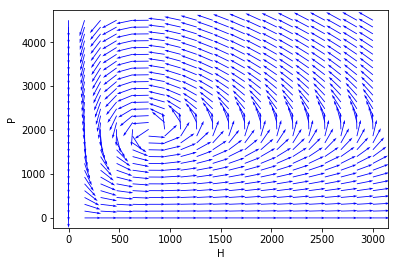

In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


a=0.1
b=5*10**(-5)
c=0.04
d=b

T=200

H0=2000
P0=1000

p=0.02
# Définition du second  membre F

def f1(x,y):
    return a*x-b*x*y
def f2(x,y):
    return -c*y+d*x*y

# Intervalle de temps

t = np.linspace(0, T, 2000)

plt.figure(1)
[x, y] = np.meshgrid(np.linspace(0 , 3000, 20) , np.linspace (0 , 4500, 30))
plt.quiver (x , y, f1(x , y)/np.sqrt(f1(x,y)**2+f2(x,y)**2), f2 (x , y)/np.sqrt(f1(x,y)**2+f2(x,y)**2),angles='xy',scale=20,color='blue')
plt.xlabel('H')
plt.ylabel('P')


On s'intéresse maintenant à calculer une solution approchée du problème de Cauchy \eqref{eq:lv}-\eqref{lvdi} par la méthode d'Euler explicite, vue au TP1. On reprend les mêmes notations que dans le TP1 : on se donne un pas $\Delta t=\frac{T}{N}>0,$ où $N\in\mathbb N,$ on considère une subdivision uniforme de pas $\Delta t$ de l'intervalle $[0, T],$ définie par les $(N+1)$ points  
$$
t_0=0,\ t_1:=\Delta t,\ \cdots,\ t_N:=N\Delta t=T, 
$$
et on note note $H^n$ (resp. $P^n$) la valeur approchée de $H(t_n)$ (resp. $P(t_n)$) à l'instant $t_n$ pour $n=0,\cdots,N$.

**Q2)** Ecrire le schéma d'Euler explicite associé au modèle de Lotka Volterra

> **Réponse:** 

\begin{equation}
  \begin{cases}
    &H^{n+1} = H^{n} +\Delta t H^{n}(a - b P^{n}) \\
    &P^{n+1} = P^{n}+\Delta t P^{n}(-c  + d H^{n}),
  \end{cases}
\end{equation}

**Q3)** Ecrire une fonction `LvoltEE(T,Y0,dt)` prenant en argument le temps final `T`, la donnée initiale `Y_0=[H_0,P_0]` correspondant aux valeurs des populations initiales en `t=0` et le pas de temps `dt` (on pourra prendre en argument `N` le nombre de points de la discrétisation, au lieu de `dt`), et qui calcule une solution approchée de \eqref{eq:lv}-\eqref{lvdi} par le schéma d'Euler explicite.

Cette fonction retournera trois tableaux:
- `[$t_0,...,t_N$]` tableau numpy de taille $(N+1)\times 1$ contenant les instants de la subdivision en temps ;
- `[$H_0,...,H_N$]` tableau numpy de taille $(N+1)\times 1$ contenant les valeurs approchées aux instantes $t_n$ de la population de sardines ;
- `[$P_0,...,P_N$]` tableau numpy de taille $(N+1)\times 1$ contenant les valeurs approchées aux instantes $t_n$ de la population de requins.

In [17]:
def LV_EE(T,Y0,dt):
    t=np.arange(0,T+dt,dt)
    N=t.size
    H=np.zeros((N,1))
    P=np.zeros((N,1))
    H[0]=Y0[0]
    P[0]=Y0[1]
    for n in range(N-1):
        H[n+1]=H[n]+dt*f1(H[n],P[n])
        P[n+1]=P[n]+dt*f2(H[n],P[n])
    return t,H,P



**Q4)** Tracer dans la même figure les solutions approchées $[H_0,H_1,\ldots,H_N]$ et $[P_0,P_1,\ldots,P_N]$ en fonction du temps, obtenues % $[t_0,\ldots,t_N]$ avec $\Delta t=0.01$. Rajouter des légendes et des titres à votre figure.

Text(0,0.5,'H,P')

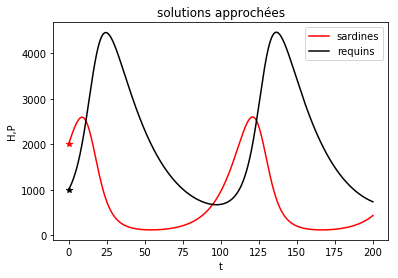

In [18]:
X0=[H0,P0]

# Pas de temps

dt=0.01

t_ap,H,P=LV_EE(T,X0,dt)
    
plt.figure(2)
plt.plot(t_ap,H,'r',label='sardines')
plt.plot(t_ap,P,'k',label='requins')
plt.plot(0,X0[0],'r*')
plt.plot(0,X0[1],'k*')
plt.legend()
plt.title('solutions approchées')
plt.xlabel('t')
plt.ylabel('H,P')


**Q5)** Créer une seconde figure et tracer  $P$ en fonction de $H$ dans le plan $(H,P)$ (portrait de phase). Refaire cette représentation dans la même figure de la question **Q1)**.

Text(0.5,1,'Trajectoires')

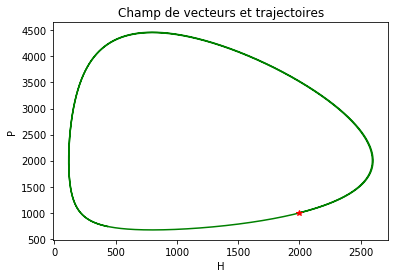

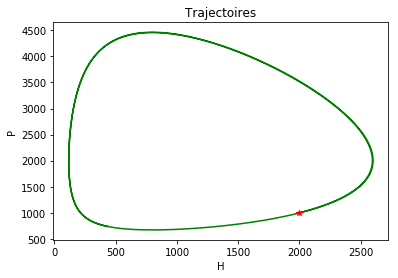

In [19]:
plt.figure(1)
plt.plot(H,P,'g')
plt.plot(X0[0],X0[1],'r*')
plt.xlabel('H')
plt.ylabel('P')
plt.title('Champ de vecteurs et trajectoires')

plt.figure(3)
plt.plot(H,P,'g')
plt.plot(X0[0],X0[1],'r*')
plt.xlabel('H')
plt.ylabel('P')
plt.title('Trajectoires')


**Q6)** Calculer la solution approchée de \eqref{eq:lv}-\eqref{lvdi}, en prenant comme condition initiale un des points d'équilibre du système. Ceci confirme-t-il la solution théorique?

Text(0,0.5,'H,P')

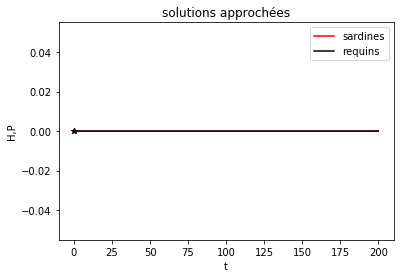

In [20]:
X0=[.0,.0]

# Pas de temps

dt=0.01

t_ap,H,P=LV_EE(T,X0,dt)
    
plt.figure(4)
plt.plot(t_ap,H,'r',label='sardines')
plt.plot(t_ap,P,'k',label='requins')
plt.plot(0,X0[0],'r*')
plt.plot(0,X0[1],'k*')
plt.legend()
plt.title('solutions approchées')
plt.xlabel('t')
plt.ylabel('H,P')


**Q7)** **(L'impact de la pêche)**  Nous pêchons maintenant une même proportion $p$ de requins et de sardines ce qui se traduit par les deux termes négatifs $-pH(t)$ et $-pP(t)$ dans les équations. Le modèle devient
\begin{equation*}
     \begin{cases}
        H'(t)&=(a-p)H(t)-bH(t)P(t),\\
        P'(t)&=(-c-p)P(t)+dH(t)P(t).
     \end{cases}
\end{equation*}
On choisit $p=0.02$. Reprendre les questions précédentes et expliquer quel est l'impact de la pêche sur l'évolution des populations. Quelle espèce est favorisée par la pêche? 

Text(0.5,1,'Trajectoires pêche')

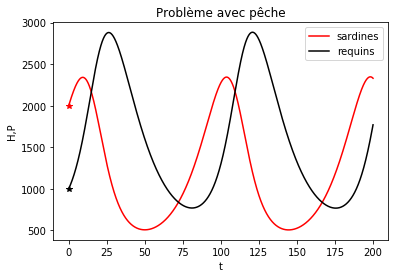

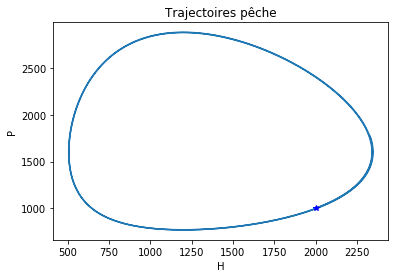

In [21]:
def f3(x,y):
    return (a-p)*x-b*x*y
def f4(x,y):
    return (-c-p)*y+d*x*y

def LV_EEP(T,X0,dt):
    t=np.arange(0,T+dt,dt)
    N=t.size
    H=np.zeros((N,1))
    P=np.zeros((N,1))
    H[0]=X0[0]
    P[0]=X0[1]
    for n in range(N-1):
        H[n+1]=H[n]+dt*f3(H[n],P[n])
        P[n+1]=P[n]+dt*f4(H[n],P[n])
    return t,H,P

X0=[H0,P0]

t_ap,H,P=LV_EEP(T,X0,dt)

plt.figure(5)
plt.plot(t_ap,H,'r',label='sardines')
plt.plot(t_ap,P,'k',label='requins')
plt.plot(0,X0[0],'r*')
plt.plot(0,X0[1],'k*')
plt.legend()
plt.title('Problème avec pêche')
plt.xlabel('t')
plt.ylabel('H,P')

plt.figure(6)
plt.plot(H,P)
plt.plot(X0[0],X0[1],'b*')
plt.xlabel('H')
plt.ylabel('P')
plt.title('Trajectoires pêche')

